In [ ]:
https://pydlm.github.io/simple_example.html

In [1]:
import numpy as np
n = 100
a = 1.0 + np.random.normal(0, 5, n) # the intercept
x = np.random.normal(0, 2, n) # the control variable
b = 3.0 # the coefficient
y = a + b * x

In [2]:
from pydlm import dlm, trend, dynamic
mydlm = dlm(y)
mydlm = mydlm + trend(degree=0, discount=0.98, name='a', w=10.0)
mydlm = mydlm + dynamic(features=[[v] for v in x], discount=1, name='b', w=10.0)

In [3]:
mydlm.evolveMode('independent')

In [4]:
mydlm.noisePrior(2.0)

In [5]:
mydlm.fit()

Initializing models...
Initialization finished.
Starting forward filtering...
Forward filtering completed.
Starting backward smoothing...
Backward smoothing completed.


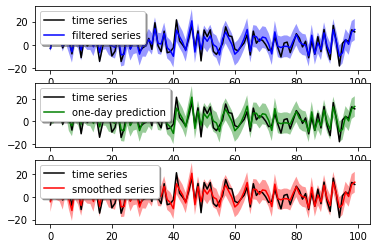

In [6]:
mydlm.plot()

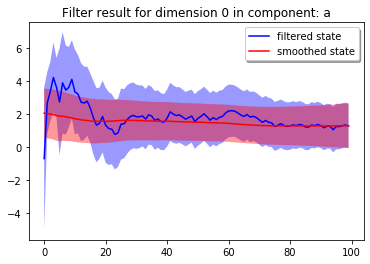

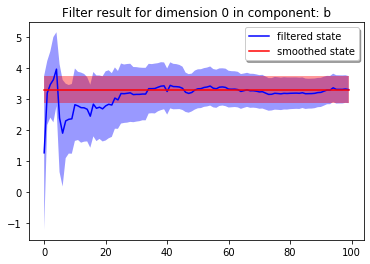

In [7]:
mydlm.turnOff('predict')
mydlm.plotCoef(name='a')
mydlm.plotCoef(name='b')

In [8]:
# get the smoothed results
smoothedResult = mydlm.getMean(filterType='backwardSmoother')
smoothedVar = mydlm.getVar(filterType='backwardSmoother')
smoothedCI = mydlm.getInterval(filterType='backwardSmoother')

# get the coefficients
coef_a = mydlm.getLatentState(filterType='backwardSmoother', name='a')
coef_a_var = mydlm.getLatentCov(filterType='backwardSmoother', name='a')
coef_b = mydlm.getLatentState(filterType='backwardSmoother', name='b')
coef_b_var = mydlm.getLatentCov(filterType='backwardSmoother', name='b')

In [9]:
# prepare the new feature
newData1 = {'b': [5]}
# one-day ahead prediction from the last day
(predictMean, predictVar) = mydlm.predict(date=mydlm.n-1, featureDict=newData1)

# continue predicting for next day
newData2 = {'b': [4]}
(predictMean, predictVar) = mydlm.continuePredict(featureDict=newData2)

# continue predicting for the third day
newData3 = {'b': [3]}
(predictMean, predictVar) = mydlm.continuePredict(featureDict=newData3)

In [10]:
newData = {'b': [[5], [4], [3]]}
(predictMean, predictVar) = mydlm.predictN(N=3, date=mydlm.n-1, featureDict=newData)